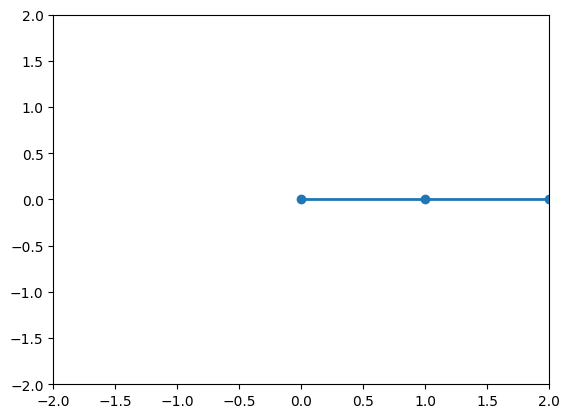

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
g = 9.81  # acceleration due to gravity (m/s^2)
L1, L2 = 1.0, 1.0  # lengths of the pendulums (m)
m1, m2 = 1.0, 1.0  # masses of the pendulums (kg)
theta1, theta2 = np.pi / 2, np.pi / 2  # initial angles (rad)
omega1, omega2 = 0.0, 0.0  # initial angular velocities (rad/s)

# Time settings
dt = 0.01  # time step (s)
t_max = 10  # total simulation time (s)

# Differential equations
def derivatives(state, t):
    theta1, omega1, theta2, omega2 = state
    delta = theta2 - theta1
    den1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) ** 2
    den2 = (L2 / L1) * den1

    dydt = np.zeros_like(state)
    dydt[0] = omega1
    dydt[1] = ((m2 * g * np.sin(theta2) * np.cos(delta) -
                m2 * np.sin(delta) * (L2 * omega2 ** 2 + L1 * omega1 ** 2 * np.cos(delta)) -
                (m1 + m2) * g * np.sin(theta1)) / den1)
    dydt[2] = omega2
    dydt[3] = (((m1 + m2) * (L1 * omega1 ** 2 * np.sin(delta) - g * np.sin(theta2) + g * np.sin(theta1) * np.cos(delta)) +
                m2 * L2 * omega2 ** 2 * np.sin(delta) * np.cos(delta)) / den2)
    return dydt

# Time integration using Runge-Kutta
def run_simulation():
    state = np.array([theta1, omega1, theta2, omega2])
    t = np.arange(0, t_max, dt)
    trajectory = np.zeros((len(t), len(state)))
    for i in range(len(t)):
        trajectory[i] = state
        k1 = dt * derivatives(state, t[i])
        k2 = dt * derivatives(state + 0.5 * k1, t[i] + 0.5 * dt)
        k3 = dt * derivatives(state + 0.5 * k2, t[i] + 0.5 * dt)
        k4 = dt * derivatives(state + k3, t[i] + dt)
        state += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return trajectory, t

trajectory, t = run_simulation()

# Calculate positions
x1 = L1 * np.sin(trajectory[:, 0])
y1 = -L1 * np.cos(trajectory[:, 0])
x2 = x1 + L2 * np.sin(trajectory[:, 2])
y2 = y1 - L2 * np.cos(trajectory[:, 2])

# Animation
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
line, = ax.plot([], [], 'o-', lw=2)

def update(frame):
    line.set_data([0, x1[frame], x2[frame]], [0, y1[frame], y2[frame]])
    return line,

ani = FuncAnimation(fig, update, frames=len(t), interval=dt * 1000, blit=True)
plt.show()
